### Load data

In [1]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')

iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.Series(iris.target)
df = pd.concat([data, target], axis=1)
df.columns.values[-1] = 'target'

### Initialize a TabularMagic object

In [2]:
import tabularmagic as tm
analyzer = tm.Analyzer(df, test_size=0.2, name='Iris scikit-learn dataset')
analyzer

INFO: Initialization complete. Shapes of train, test DataFrames: (120, 5), (30, 
      5). 


Iris scikit-learn dataset 
--------------------------------------------------------------------------------
Train shape: (120, 5)                    Test shape: (30, 5)                    
--------------------------------------------------------------------------------
Categorical variables:
  None 
                                                                                
numeric variables:
  'sepallength(cm)', 'sepalwidth(cm)', 'petallength(cm)', 'petalwidth(cm)', 
  'target' 

### Preprocessing

Force target to categorical

In [3]:
analyzer.datahandler().force_categorical(['target'])

INFO: Forced variables 'target' to categorical. 


Iris scikit-learn dataset 
--------------------------------------------------------------------------------
Train shape: (120, 5)                    Test shape: (30, 5)                    
--------------------------------------------------------------------------------
Categorical variables:
  'target' 
                                                                                
numeric variables:
  'sepallength(cm)', 'sepalwidth(cm)', 'petallength(cm)', 'petalwidth(cm)' 

### Conduct exploratory analysis

Visualize the distribution of petallength(cm) stratified by the target

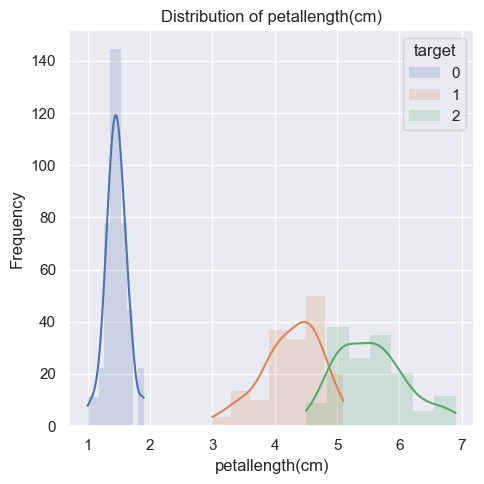

In [4]:
analyzer.eda(dataset='all').plot_distribution_stratified(
    'petallength(cm)', 'target', strategy='stacked_hist_kde_frequency')

Visualize the distribution of all continuous variables

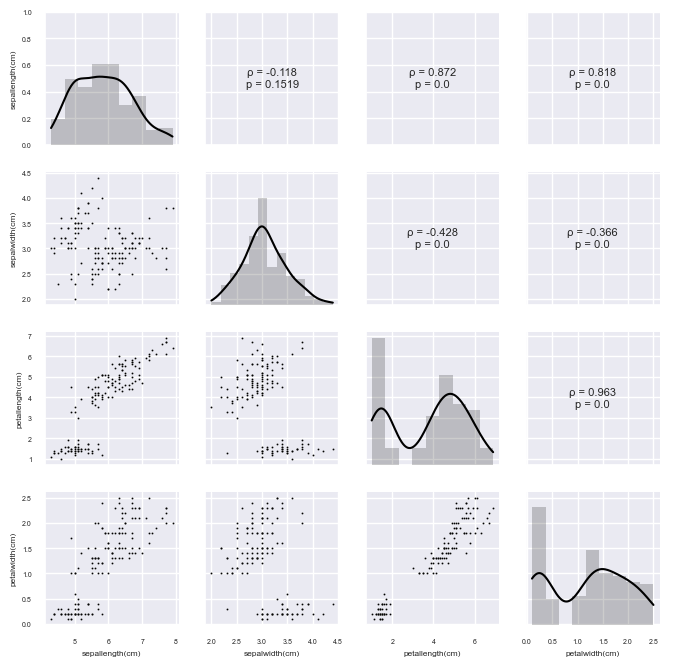

In [8]:
analyzer.eda(dataset='all').plot_numeric_pairs(
    numeric_vars=analyzer.datahandler().numeric_vars()
)

Visualize PCA stratified by the target label

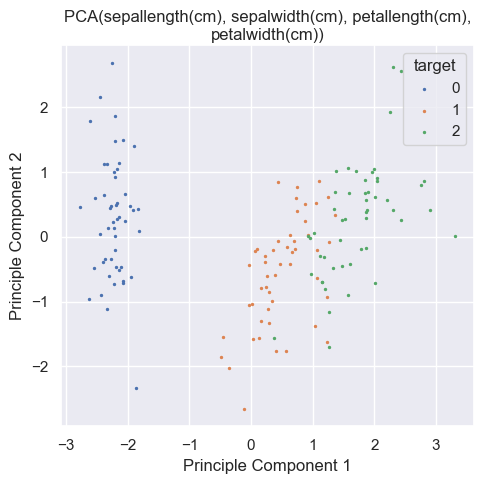

In [11]:
analyzer.eda(dataset='all').plot_pca(
    numeric_vars=analyzer.datahandler().numeric_vars(), 
    stratify_by='target'
)

### Machine learning classification benchmarking

In [12]:
from sklearn.linear_model import LogisticRegression


report = analyzer.ml_classification(
    models=[
        tm.ml.LinearC(type='no_penalty'),
        tm.ml.LinearC(type='l2'),
        tm.ml.LinearC(type='elasticnet'),
        tm.ml.CustomC(LogisticRegression(), 'logistic')
    ], 
    y_var='target',
    outer_cv=5,
    outer_cv_seed=0
)

INFO: Fitting model LinearC(no_penalty). 
INFO: Fitted model LinearC(no_penalty). 
INFO: Fitting model LinearC(l2). 
INFO: Fitted model LinearC(l2). 
INFO: Fitting model LinearC(elasticnet). 
INFO: Fitted model LinearC(elasticnet). 
INFO: Fitting model logistic. 
INFO: Fitted model logistic. 


View fit statistics for each fold

In [13]:
report.cv_fit_statistics()

,LinearC(no_penalty),LinearC(l2),LinearC(elasticnet),logistic
Statistic,,,,
accuracy,0.958333,0.95,0.975,0.958333
f1,0.952359,0.942467,0.9698,0.956208
precision,0.954286,0.943701,0.977778,0.959892
recall,0.954545,0.943939,0.969444,0.956638
roc_auc(ovo),0.990278,0.994781,0.994781,0.995244
n,24.0,24.0,24.0,24.0


In [14]:
report.fit_statistics('train')

,LinearC(no_penalty),LinearC(l2),LinearC(elasticnet),logistic
Statistic,,,,
accuracy,0.983333,0.966667,0.983333,0.975
f1,0.983323,0.966667,0.983333,0.974996
precision,0.983323,0.967063,0.98374,0.97619
recall,0.983323,0.967063,0.98374,0.97561
roc_auc(ovo),0.998749,0.997394,0.998332,0.998124
n,120,120,120,120


In [15]:
report.model_report('LinearC(elasticnet)').train_report().cv_fit_statistics_by_class()

LinearC(elasticnet)
Class Statistic                       
0     accuracy                   0.975
      f1                           1.0
      n                           24.0
      precision                    1.0
      recall                       1.0
      roc_auc(ovr)                 1.0
1     accuracy                   0.975
      f1                      0.946667
      n                           24.0
      precision                    1.0
      recall                  0.908333
      roc_auc(ovr)            0.993171
2     accuracy                   0.975
      f1                      0.962733
      n                           24.0
      precision               0.933333
      recall                       1.0
      roc_auc(ovr)            0.993499